## Image Clasification Using Dense Layers -- MNIST Dataset

### Install Dependencies

In [0]:
!pip install tensorflow_datasets --user

### Setup the Libraries

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

tf.get_logger().setLevel(logging.ERROR)
tfds.disable_progress_bar()

TensorFlow 2.x selected.


### Load the MNIST Dataset

In [0]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
print(dataset, "\n")
print(metadata)

{'test': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, 'train': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>} 

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [0]:
num_train_example = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples : {}".format(num_train_example))
print("Number of testing examples :  {}".format(num_test_examples))

Number of training examples : 60000
Number of testing examples :  10000


### Preprocess the Data

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

### Little Exploration

(28, 28, 1)
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  47 156 240 254 255 240  60   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7 122 245 253 248 215 226 253 149   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  31 166 253 249 1

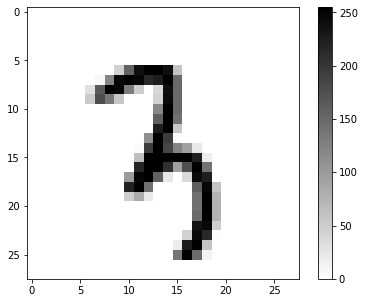


3

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.

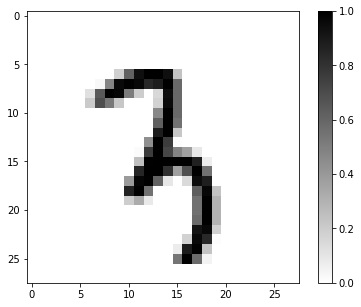


3


In [0]:
for train_image, train_label in train_dataset.take(1):
  break

print(train_image.shape)
train_image = train_image.numpy().reshape((28, 28))
print(train_image.shape)
print(train_image)

plt.figure(figsize=(7, 5))
plt.imshow(train_image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print("\n{}\n".format(train_label))

train_image, train_label = normalize(train_image, train_label)
train_image = train_image.numpy().reshape((28, 28))
print(train_image)

plt.figure(figsize=(7, 5))
plt.imshow(train_image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print("\n{}".format(train_label))

In [0]:
class_labels = ["Zero", "One", "Two", "Three", "Four", 
                "Five", "Six", "Seven", "Eight", "Nine"]

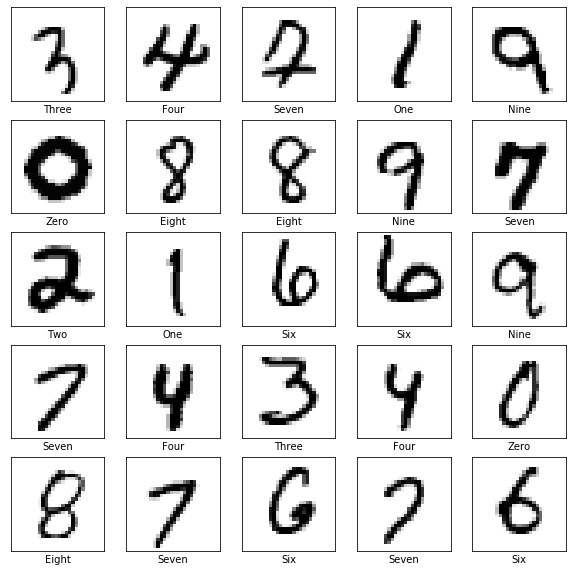

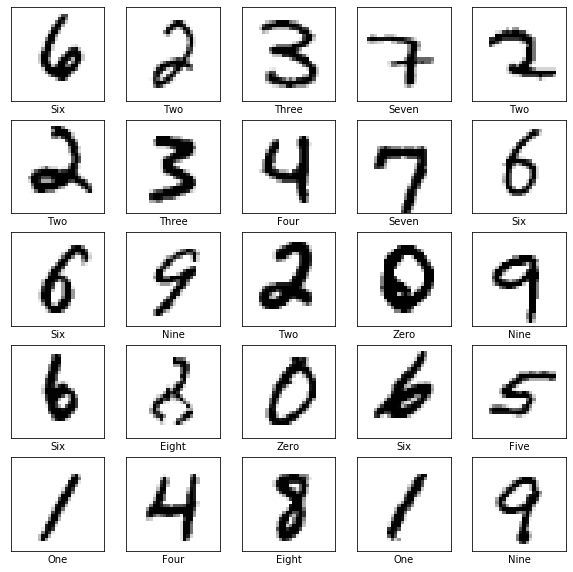

In [0]:
i = 0
plt.figure(figsize=(10, 10))
plt.title("1st 25 Training Examples")
for train_images_25, train_labels_25 in train_dataset.take(25):
  train_images_25 = train_images_25.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.imshow(train_images_25, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("{}".format(class_labels[train_labels_25]))
  i += 1
plt.show()

print("\n\n")

i = 0
plt.figure(figsize=(10, 10))
for test_images_25, test_labels_25 in test_dataset.take(25):
  test_images_25 = test_images_25.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.imshow(test_images_25, cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel("{}".format(class_labels[test_labels_25]))
  i += 1
plt.show()

In [0]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Caching the datasets makes the training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

### Build the Model

In [0]:
for train_img, train_lab in train_dataset.take(1):
  break

input_shape = train_img.shape
print(input_shape)

(28, 28, 1)


In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape), 
  tf.keras.layers.Dense(units=16, activation=tf.nn.relu), 
  tf.keras.layers.Dense(units=16, activation=tf.nn.sigmoid), 
  tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

### Compile the Model

In [0]:
model_1.compile(loss='sparse_categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

### Fit the Model

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_example).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
model_1.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_example / BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7281 - accuracy: 0.8408
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2942 - accuracy: 0.9208
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2229 - accuracy: 0.9375
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1965 - accuracy: 0.9430
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1778 - accuracy: 0.9489


### Evaluate the Model

In [0]:
test_loss, test_accuracy = model_1.evaluate(test_dataset, steps=math.ceil(num_test_examples / BATCH_SIZE))
print("Test Accuaracy of the Model : {}".format(test_accuracy))

313/313 [==============================] - 3s 11ms/step - loss: 0.1945 - accuracy: 0.9421
Test Accuaracy of the Model : 0.9420999884605408


### Predictions by the Model

In [0]:
for test_img, test_lab in test_dataset.take(1):
  test_img = test_img.numpy()
  test_lab = test_lab.numpy()
  predictions = model_1.predict(test_img)

In [0]:
print(len(predictions))
print(np.argmax(predictions[0]) == test_lab[0], "\n")

for i in range(0, BATCH_SIZE, 1):
  if np.argmax(predictions[i]) == test_lab[i]:
    print("{} --> {} \t--> Confidence : {}".format(
        True, class_labels[test_lab[i]], predictions[i][np.argmax(predictions[i])]))
  else:
    print(False)

32
True 

True --> Six 	--> Confidence : 0.9784788489341736
True --> Two 	--> Confidence : 0.9966263771057129
True --> Three 	--> Confidence : 0.9970927238464355
True --> Seven 	--> Confidence : 0.9839367866516113
True --> Two 	--> Confidence : 0.8474221229553223
True --> Two 	--> Confidence : 0.9971339702606201
True --> Three 	--> Confidence : 0.9968079924583435
True --> Four 	--> Confidence : 0.9944301247596741
True --> Seven 	--> Confidence : 0.9863965511322021
True --> Six 	--> Confidence : 0.981747031211853
True --> Six 	--> Confidence : 0.7723618149757385
True --> Nine 	--> Confidence : 0.9576612710952759
True --> Two 	--> Confidence : 0.9974349141120911
True --> Zero 	--> Confidence : 0.7198190093040466
True --> Nine 	--> Confidence : 0.9945670366287231
True --> Six 	--> Confidence : 0.984713613986969
False
True --> Zero 	--> Confidence : 0.9946367144584656
True --> Six 	--> Confidence : 0.9936461448669434
True --> Five 	--> Confidence : 0.9912071824073792
True --> One 	--> Conf

### Beautiful Plots

In [0]:
def plot_the_specific_image(index_img, 
                            predictions_arr, 
                            actual_labels, 
                            images_tested):
  predictions_arr = predictions_arr[index_img]
  actual_label = actual_labels[index_img]
  image_testing = images_tested[index_img]

  plt.imshow(X=image_testing[..., 0], cmap=plt.cm.binary)

  prediction_label = np.argmax(predictions_arr)
  if prediction_label == actual_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[prediction_label], 
                                       100*np.max(predictions_arr), 
                                       class_labels[actual_label]), color=color)

def plot_the_prediction_array(index_img, 
                              predictions_arr, 
                              actual_labels):
  predictions_arr = predictions_arr[index_img]
  actual_label = actual_labels[index_img]

  this_bar_plot = plt.bar(range(len(class_labels)), predictions_arr)
  plt.xticks(range(len(class_labels)))
  plt.ylim([0, 1])
  plt.grid(False)
  
  prediction_lab = np.argmax(predictions_arr)
  this_bar_plot[prediction_lab].set_color('red')
  this_bar_plot[actual_label].set_color('blue')

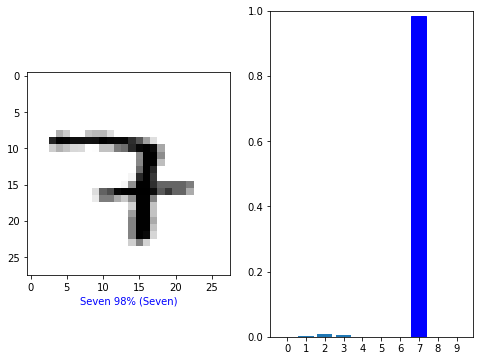

In [0]:
index_img = 3
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plot_the_specific_image(index_img=index_img, 
                        predictions_arr=predictions, 
                        actual_labels=test_lab, 
                        images_tested=test_img)

plt.subplot(1, 2, 2)
plot_the_prediction_array(index_img=index_img, 
                          predictions_arr=predictions, 
                          actual_labels=test_lab)
plt.show()

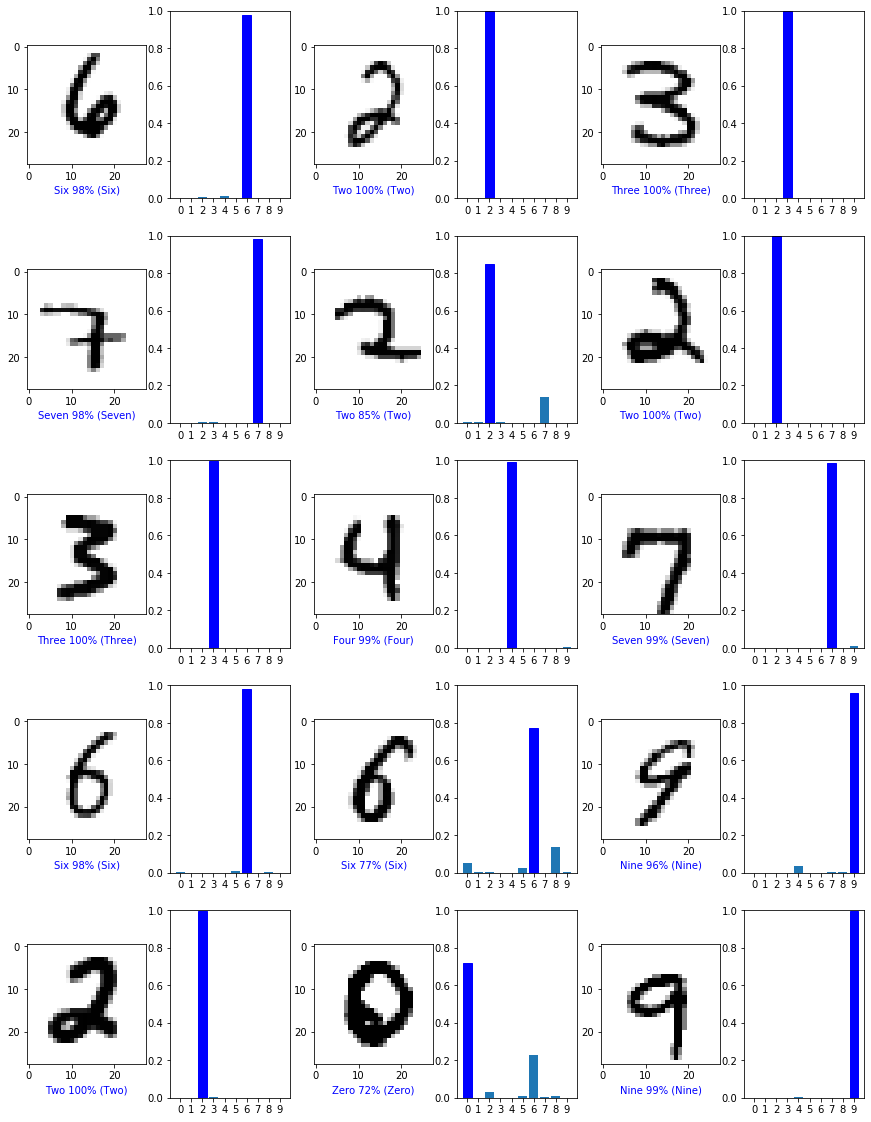

In [0]:
num_rows = 5
num_cols = 3
num_imgs = num_rows * num_cols

plt.figure(figsize=((2*2+1)*num_cols, 2*2*num_rows))
for image_index in range(num_imgs):
  plt.subplot(num_rows, 2*num_cols, 2*image_index+1)
  plot_the_specific_image(index_img=image_index, 
                          predictions_arr=predictions, 
                          actual_labels=test_lab, 
                          images_tested=test_img)
  plt.subplot(num_rows, 2*num_cols, 2*image_index+2)
  plot_the_prediction_array(index_img=image_index, 
                            predictions_arr=predictions, 
                            actual_labels=test_lab)


In [0]:
test_final_1_img = test_img[0]
print(test_final_1_img.shape)

test_final_1_img = np.array([test_final_1_img])
print(test_final_1_img.shape)

(28, 28, 1)
(1, 28, 28, 1)


In [0]:
prediction_single = model_1.predict(test_final_1_img)
print(prediction_single)

[[1.6130015e-03 6.5452931e-04 5.2843816e-03 3.3255914e-05 1.2989812e-02
  2.6573605e-04 9.7847909e-01 3.2822939e-04 2.3965503e-04 1.1232373e-04]]


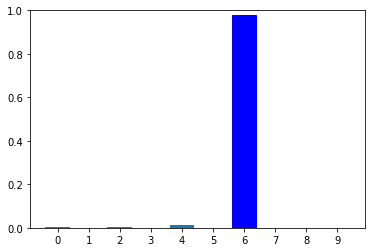

In [0]:
plot_the_prediction_array(index_img=0, 
                          predictions_arr=prediction_single, 
                          actual_labels=test_lab)

In [0]:
print(np.argmax(prediction_single))

if np.argmax(prediction_single) == test_lab[0]:
  print(True, "--> ", class_labels[np.argmax(prediction_single)])

6
True -->  Six


### Prerequisite Exploration

In [0]:
for train_img_, train_lab_ in train_dataset.take(1):
  break
print("Train Data Dimension Exploration")
print(train_img_.shape)
print(len(train_img_))
print(len(train_img_[0]))
print(train_img_[0][0])

print("\nTest Data Dimension Exploration")
print(test_img.shape)
print(len(test_img))
print(len(test_img[0]))
print(test_img[0][0])

Train Data Dimension Exploration
(32, 28, 28, 1)
32
28
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(28, 1), dtype=float32)

Test Data Dimension Exploration
(32, 28, 28, 1)
32
28
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [0]:
arr_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(arr_1)

print(arr_1[0])
print(arr_1[..., 0])
print(arr_1[0] == arr_1[..., 0])

[ 1  2  3  4  5  6  7  8  9 10]
1
1
True


['one', 'two', 'three', 'four', 'five']
[100, 200, 300, 400, 500]
[0 1 2 3 4]


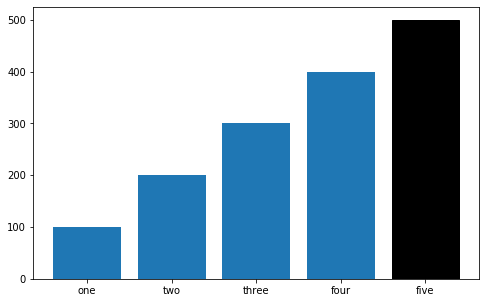

In [0]:
bar_index = ['one', 'two', 'three', 'four', 'five']
bar_value = [100, 200, 300, 400, 500]

index_barring = np.arange(len(bar_index))

print(bar_index)
print(bar_value)
print(index_barring)

plt.figure(figsize=(8, 5))
bar = plt.bar(bar_index, bar_value)

bar[4].set_color('black')
plt.show()